# MNIST Workshop

### Witajcie

Na tym workshopie zamiemy się rozpoznaniem odręczenie pisanych cyfr - klasycznym problemem w uczeniu maszynowym, który *wciąż* stosowany jest w wielu problemach jako podstawa do najnowszych badan naukowych. Warto poznać zbiór MNIST'a, ale przede wszystkim warto poznać techniki które pozwalają na pracę z danymi osadzonymi w przestrzeniach wielowymiarowych, takimi jak obrazy.

###  Dlaczego dane wielowymiarowe? 
Czym jest obraz gdy patrzymy na niego przez większość algorytów ML? To po prostu wektor - strzałka wskazujaca na punkt w przestarzeni $R^N$, gdzie $N$ oznacza ilość wymiarów w tej przestrzeni. Ile jest wymiarów? Tyle ile pikseli * tyle ile mamy kanałów w obrazie (przeważnie 3 - RGB). Brzmi to na początku abstrakcyjnie - ale taka reprezentacja obrazu faktycznie jest stosowana w uczeniu maszynowym! Zobaczmy w takim razie jak to wygląda na przykładzie MNIST - zbioru odręcznie pisanych cyfr, na monochromatycznych obrazkach o rozmiarach 28 na 28 pikseli.

## Jak wyglądają cyferki MNISTa?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# show 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width as input)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    img_matrix = np.empty(shape=(rows_count * (tile_height + space_between_tiles) - space_between_tiles,  
                                 cols_count * (tile_width + space_between_tiles) - space_between_tiles))
    img_matrix.fill(np.nan)

    # TODO: fill in loops that copy 2D slices from 4D tensor into 2D grid to display
    
    return img_matrix

In [3]:
# DONE!
# show 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width as input)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    img_matrix = np.empty(shape=(rows_count * (tile_height + space_between_tiles) - space_between_tiles,  
                                 cols_count * (tile_width + space_between_tiles) - space_between_tiles))
    img_matrix.fill(np.nan)

    for r in range(rows_count):
        for c in range(cols_count):
            x_0 = r * (tile_height + space_between_tiles)
            y_0 = c * (tile_width + space_between_tiles)
            img_matrix[x_0:x_0 + tile_height, y_0:y_0 + tile_width] = examples[r, c]
    
    return img_matrix

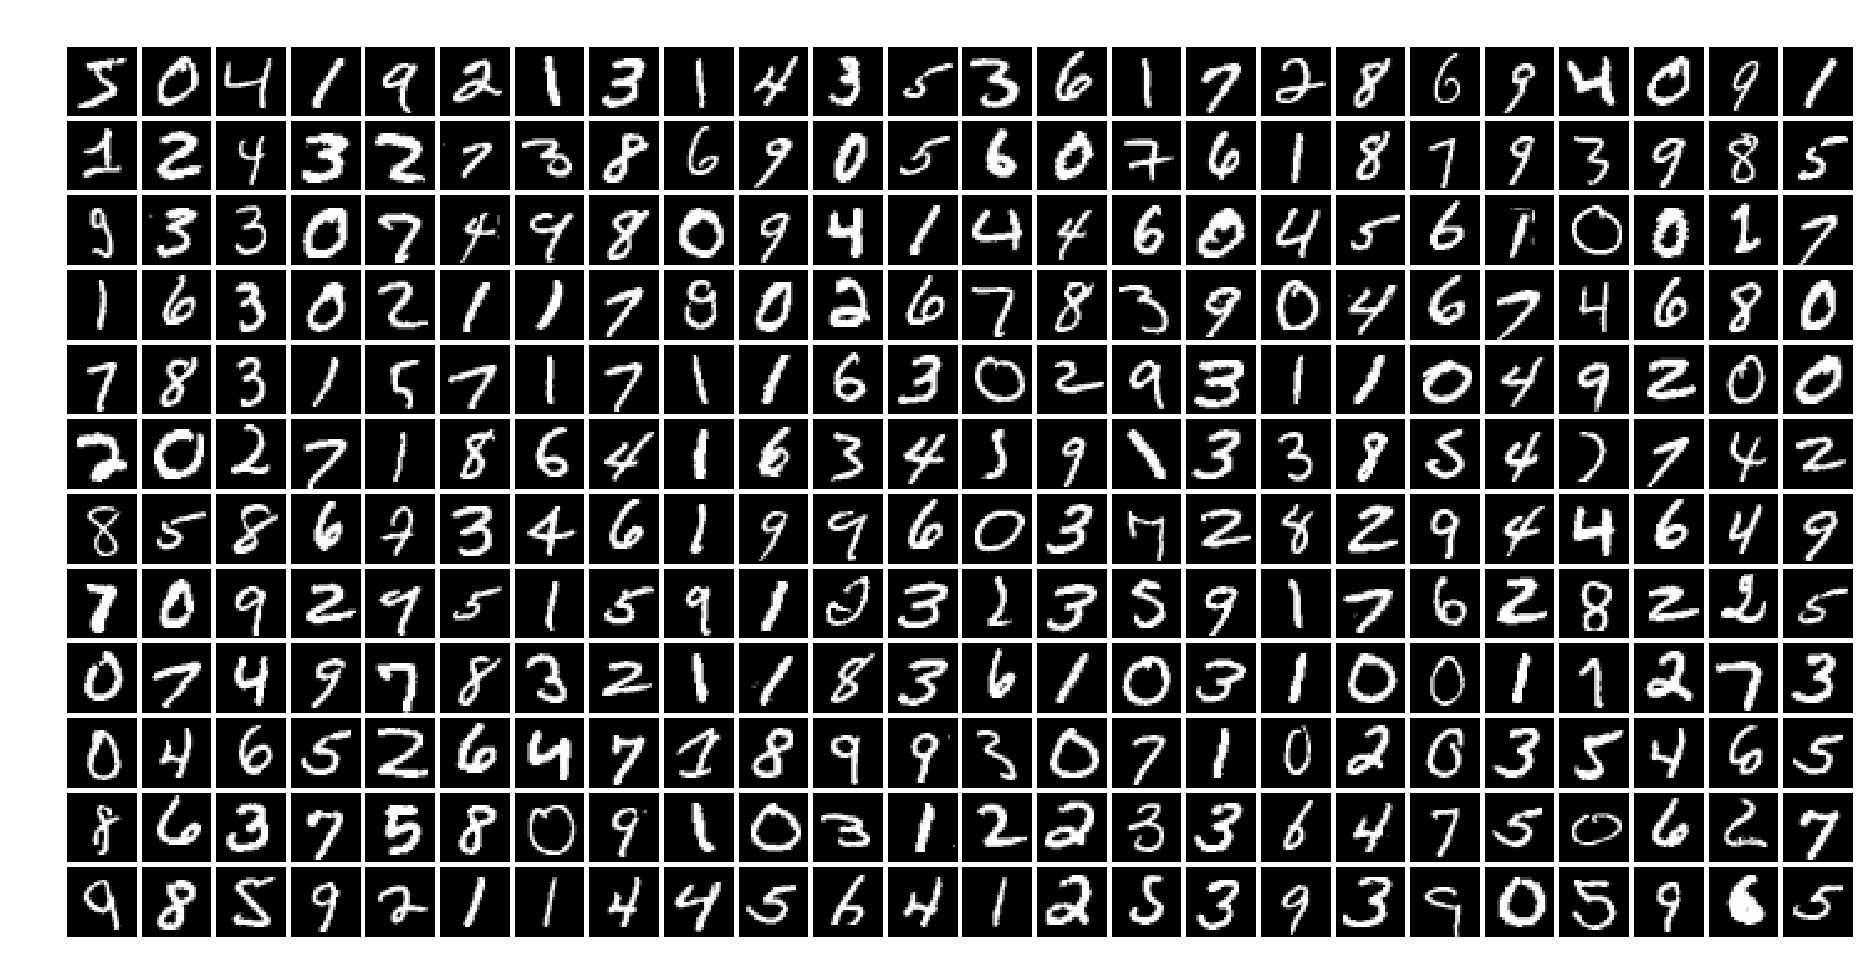

In [4]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))

img = tiles(digits)
plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [5]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

In [6]:
# reshape `X` so that the last two dimensions are collapsed into single dimension
# X = ???

In [7]:
# DONE!
# reshape `X` so that the last two dimensions are collapsed into single dimension
X = np.reshape(X, (X.shape[0], -1))

# Wbudujmy nasze obserwacje ze zbioru MNIST w niskowymiarową przestrzeń 

Ciężko nam sobie wyobrazić jak wyglądają takie obserwacje w 784 wymiarach - dlatego powstały techniki redukcji wymiarowości, zachowujące jak najwięcej informacji o wzajemnym położeniu punktów w oryginalnej przestrzeni. Na początku zobaczymy jak działa klasyczna metoda (dość prosta, bo liniowa), polegająca na zmianie układu współrzędnych tak, by na kolejnych osiach zachowywać jak najwięcej wariancji z oryginalnego zbioru - **Principal Components Analysis**, czyli mówiąc krótko - **PCA**.

In [8]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    # TODO: plot each digit observations at given coordinates with seperate scatter and appropriate label
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

In [9]:
# DONE!
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = y == i
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label=str(i))

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

In [10]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

In [11]:
# TODO: Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

from sklearn.decomposition import PCA

# pca =  ???
# X_pca_embedded = ???

In [12]:
# DONE!
# TODO: Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [13]:
X_pca_embedded.shape

(2000, 2)

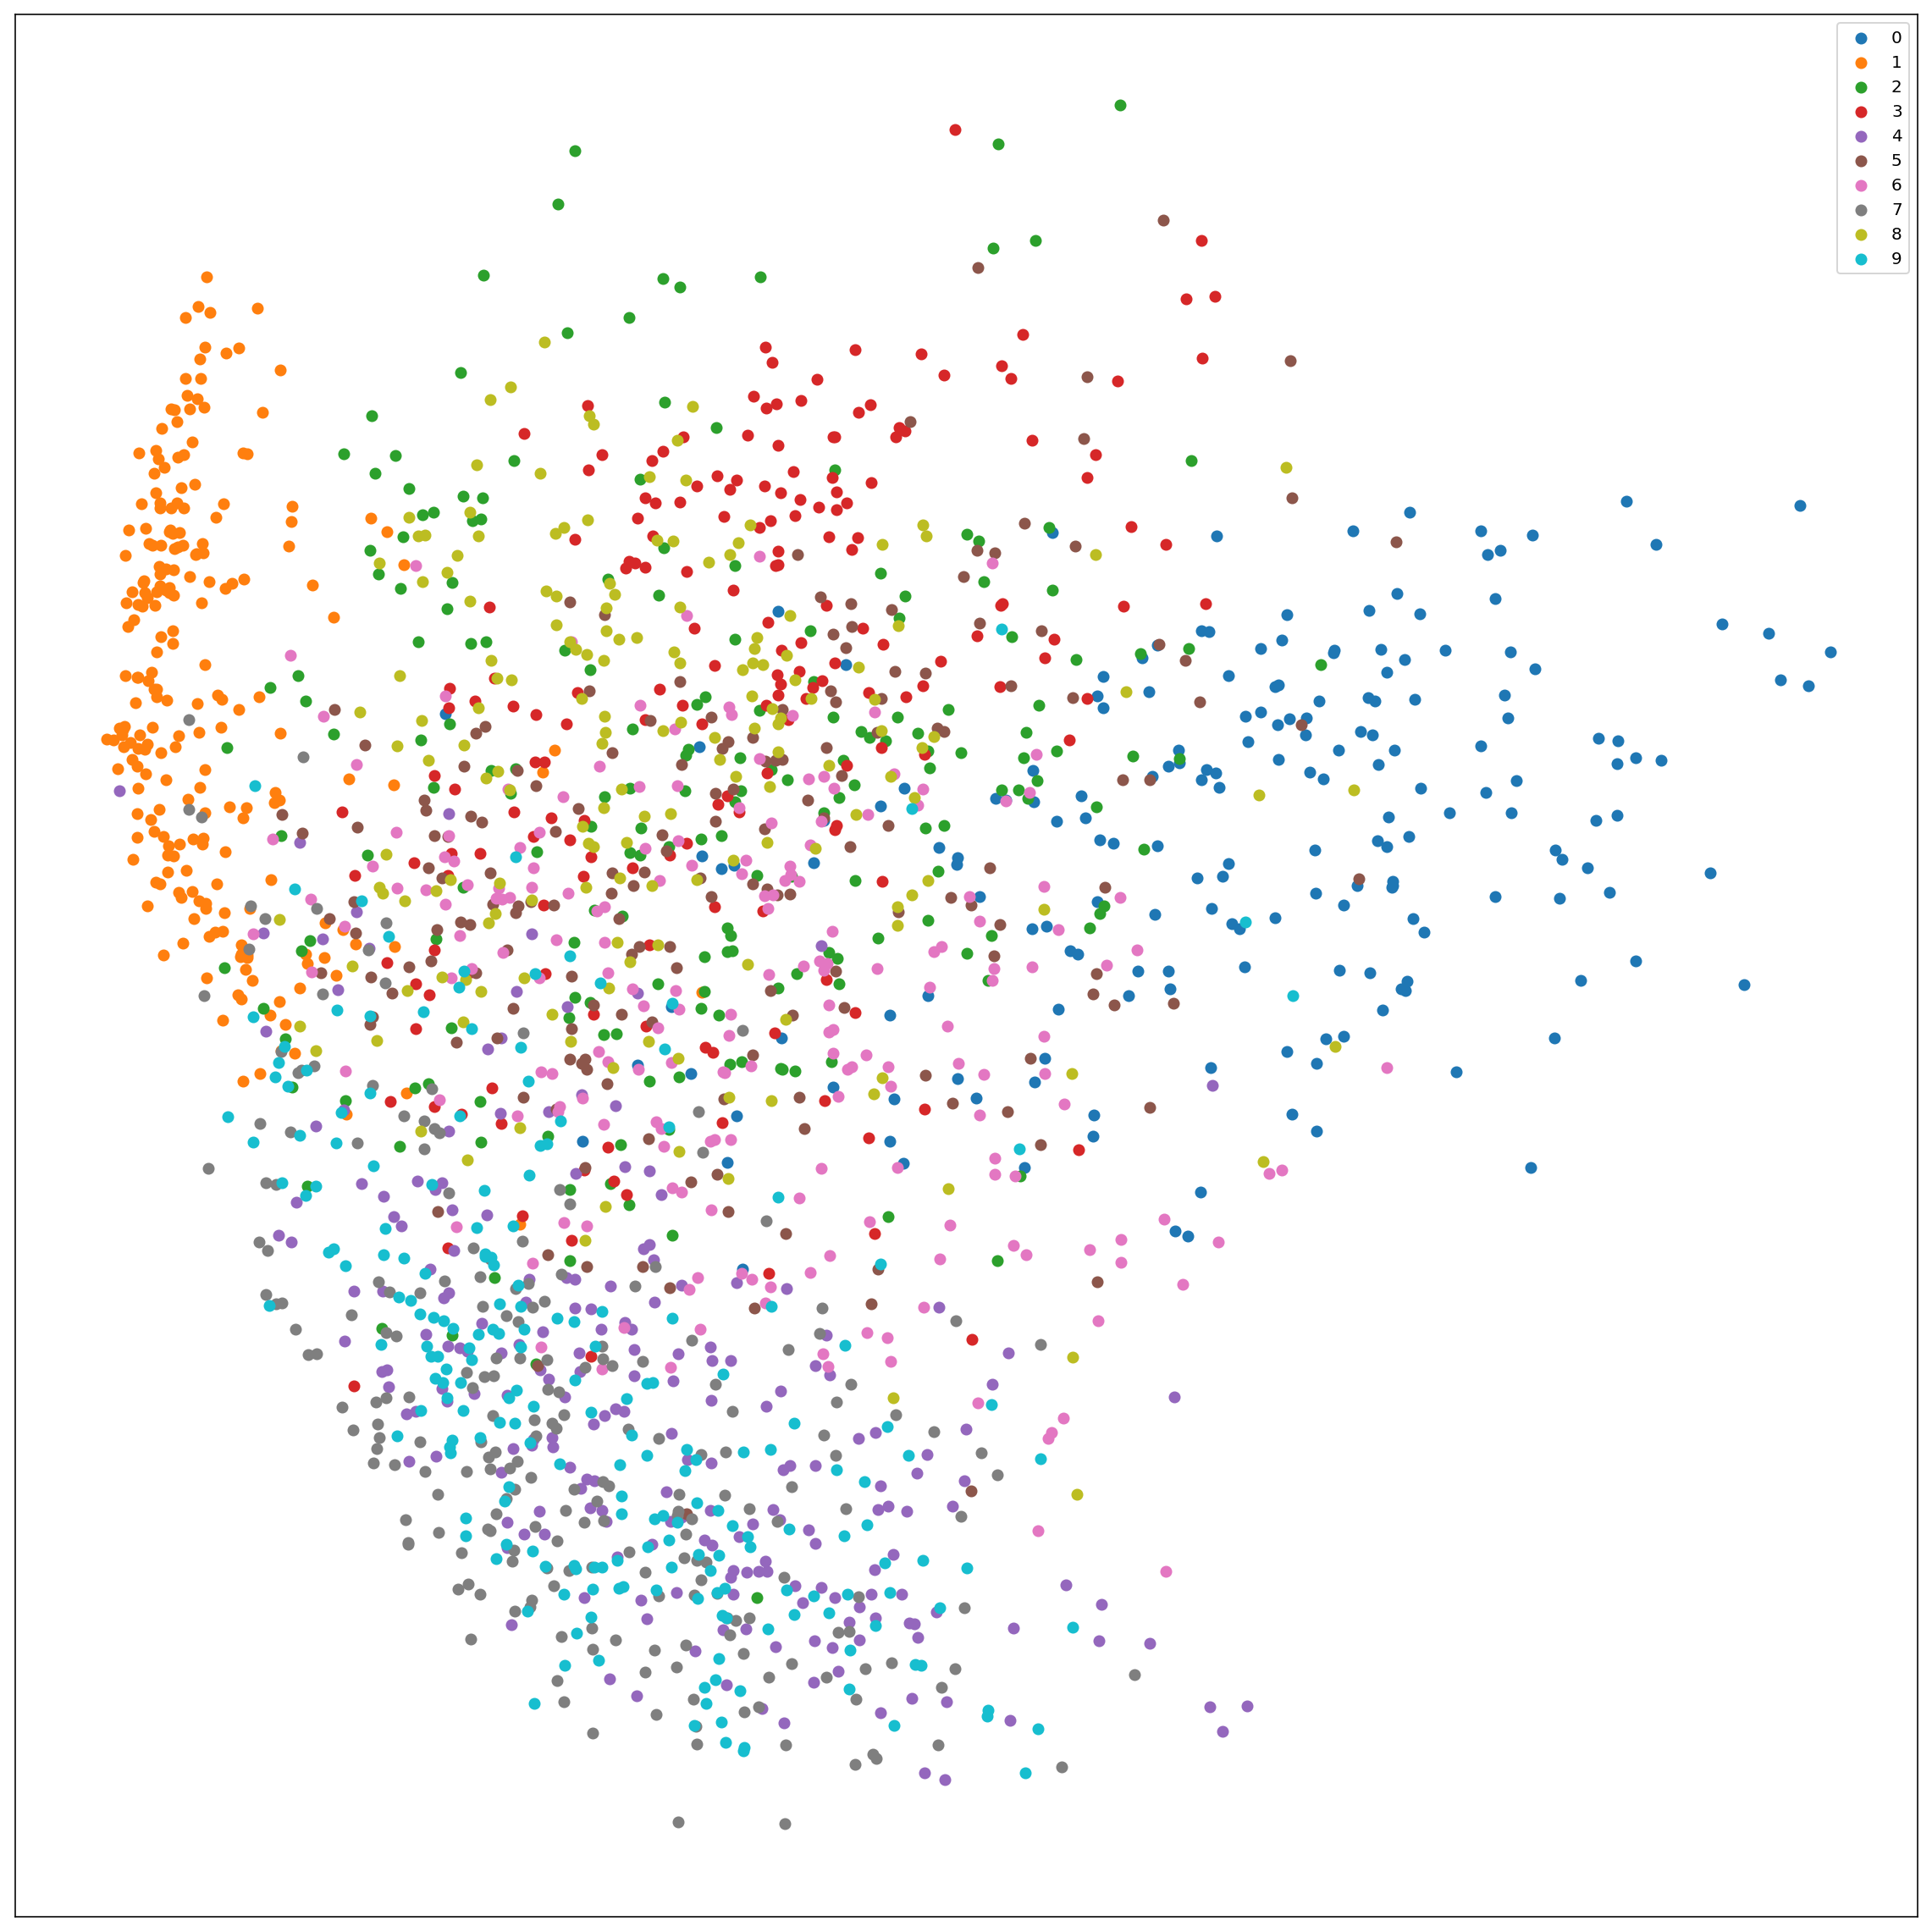

In [14]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

Ile wariancji udało się zachować w naszych dwóch pierwszych składowych głównych? 

In [15]:
pca.explained_variance_ratio_

array([ 0.10009538,  0.0746062 ], dtype=float32)

Jak widać, rzut z 784 wymiarów zachował zadziwiająco dużo informacji, utrzymując poszczególne obserwacje we względnie zwartych grupach. W dwóch pierwszych składowych głównych udało nam się zachować kolejno 10.0% i 7.4% wariancji z oryginalnych danych - dużo straciliśmy, ale zachowanie 17.4% wariancji przy pozostawieniu tylko 0.26% ze wszystkich wymiarów to i tak duże osiągnięcie. 

Czy możemy lepiej? Oczywiście! Musimy jednak skorzystać z modelu, który będzie w stanie zamodelować nieliniowe relacje w danych - znajdziemy tzw. dwuwymiarowy manifold na którym układają sie dane w przestrzeni 784 wymiarowej stosując technikę **t-distributed Stochastic Neighbour Embedding**, znaną pod skrótem **t-SNE**.

In [16]:
# TODO: Use t-SNE from sklearn package to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`.

from sklearn.manifold import TSNE

# tsne = ???
# X_tsne_embedded = ???

In [17]:
# DONE!
# TODO: Use t-SNE from sklearn package to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.062s...
[t-SNE] Computed neighbors for 2000 samples in 3.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 78.0275116, gradient norm = 0.0129069 (50 iterations in 3.057s)
[t-SNE] Iteration 100: error = 76.0567093, gradient norm = 0.0196092 (50 iterations in 2.685s)
[t-SNE] Iteration 150: error = 75.6794052, gradient norm = 0.0017409 (50 iterations in 2.436s)
[t-SNE] Iteration 200: error = 75.6553345, gradient norm = 0.0101178 (50 iterations in 2.569s)
[t-SNE] Iteration 250: error = 75.6037674, gradient norm = 0.0141681 (50 iterations in 2.731s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.603767
[t-SNE] Iteration 300: error = 1.4736798, gradient norm = 0.0009770 (50 iterations in 2.195s)

In [18]:
X_tsne_embedded.shape

(2000, 2)

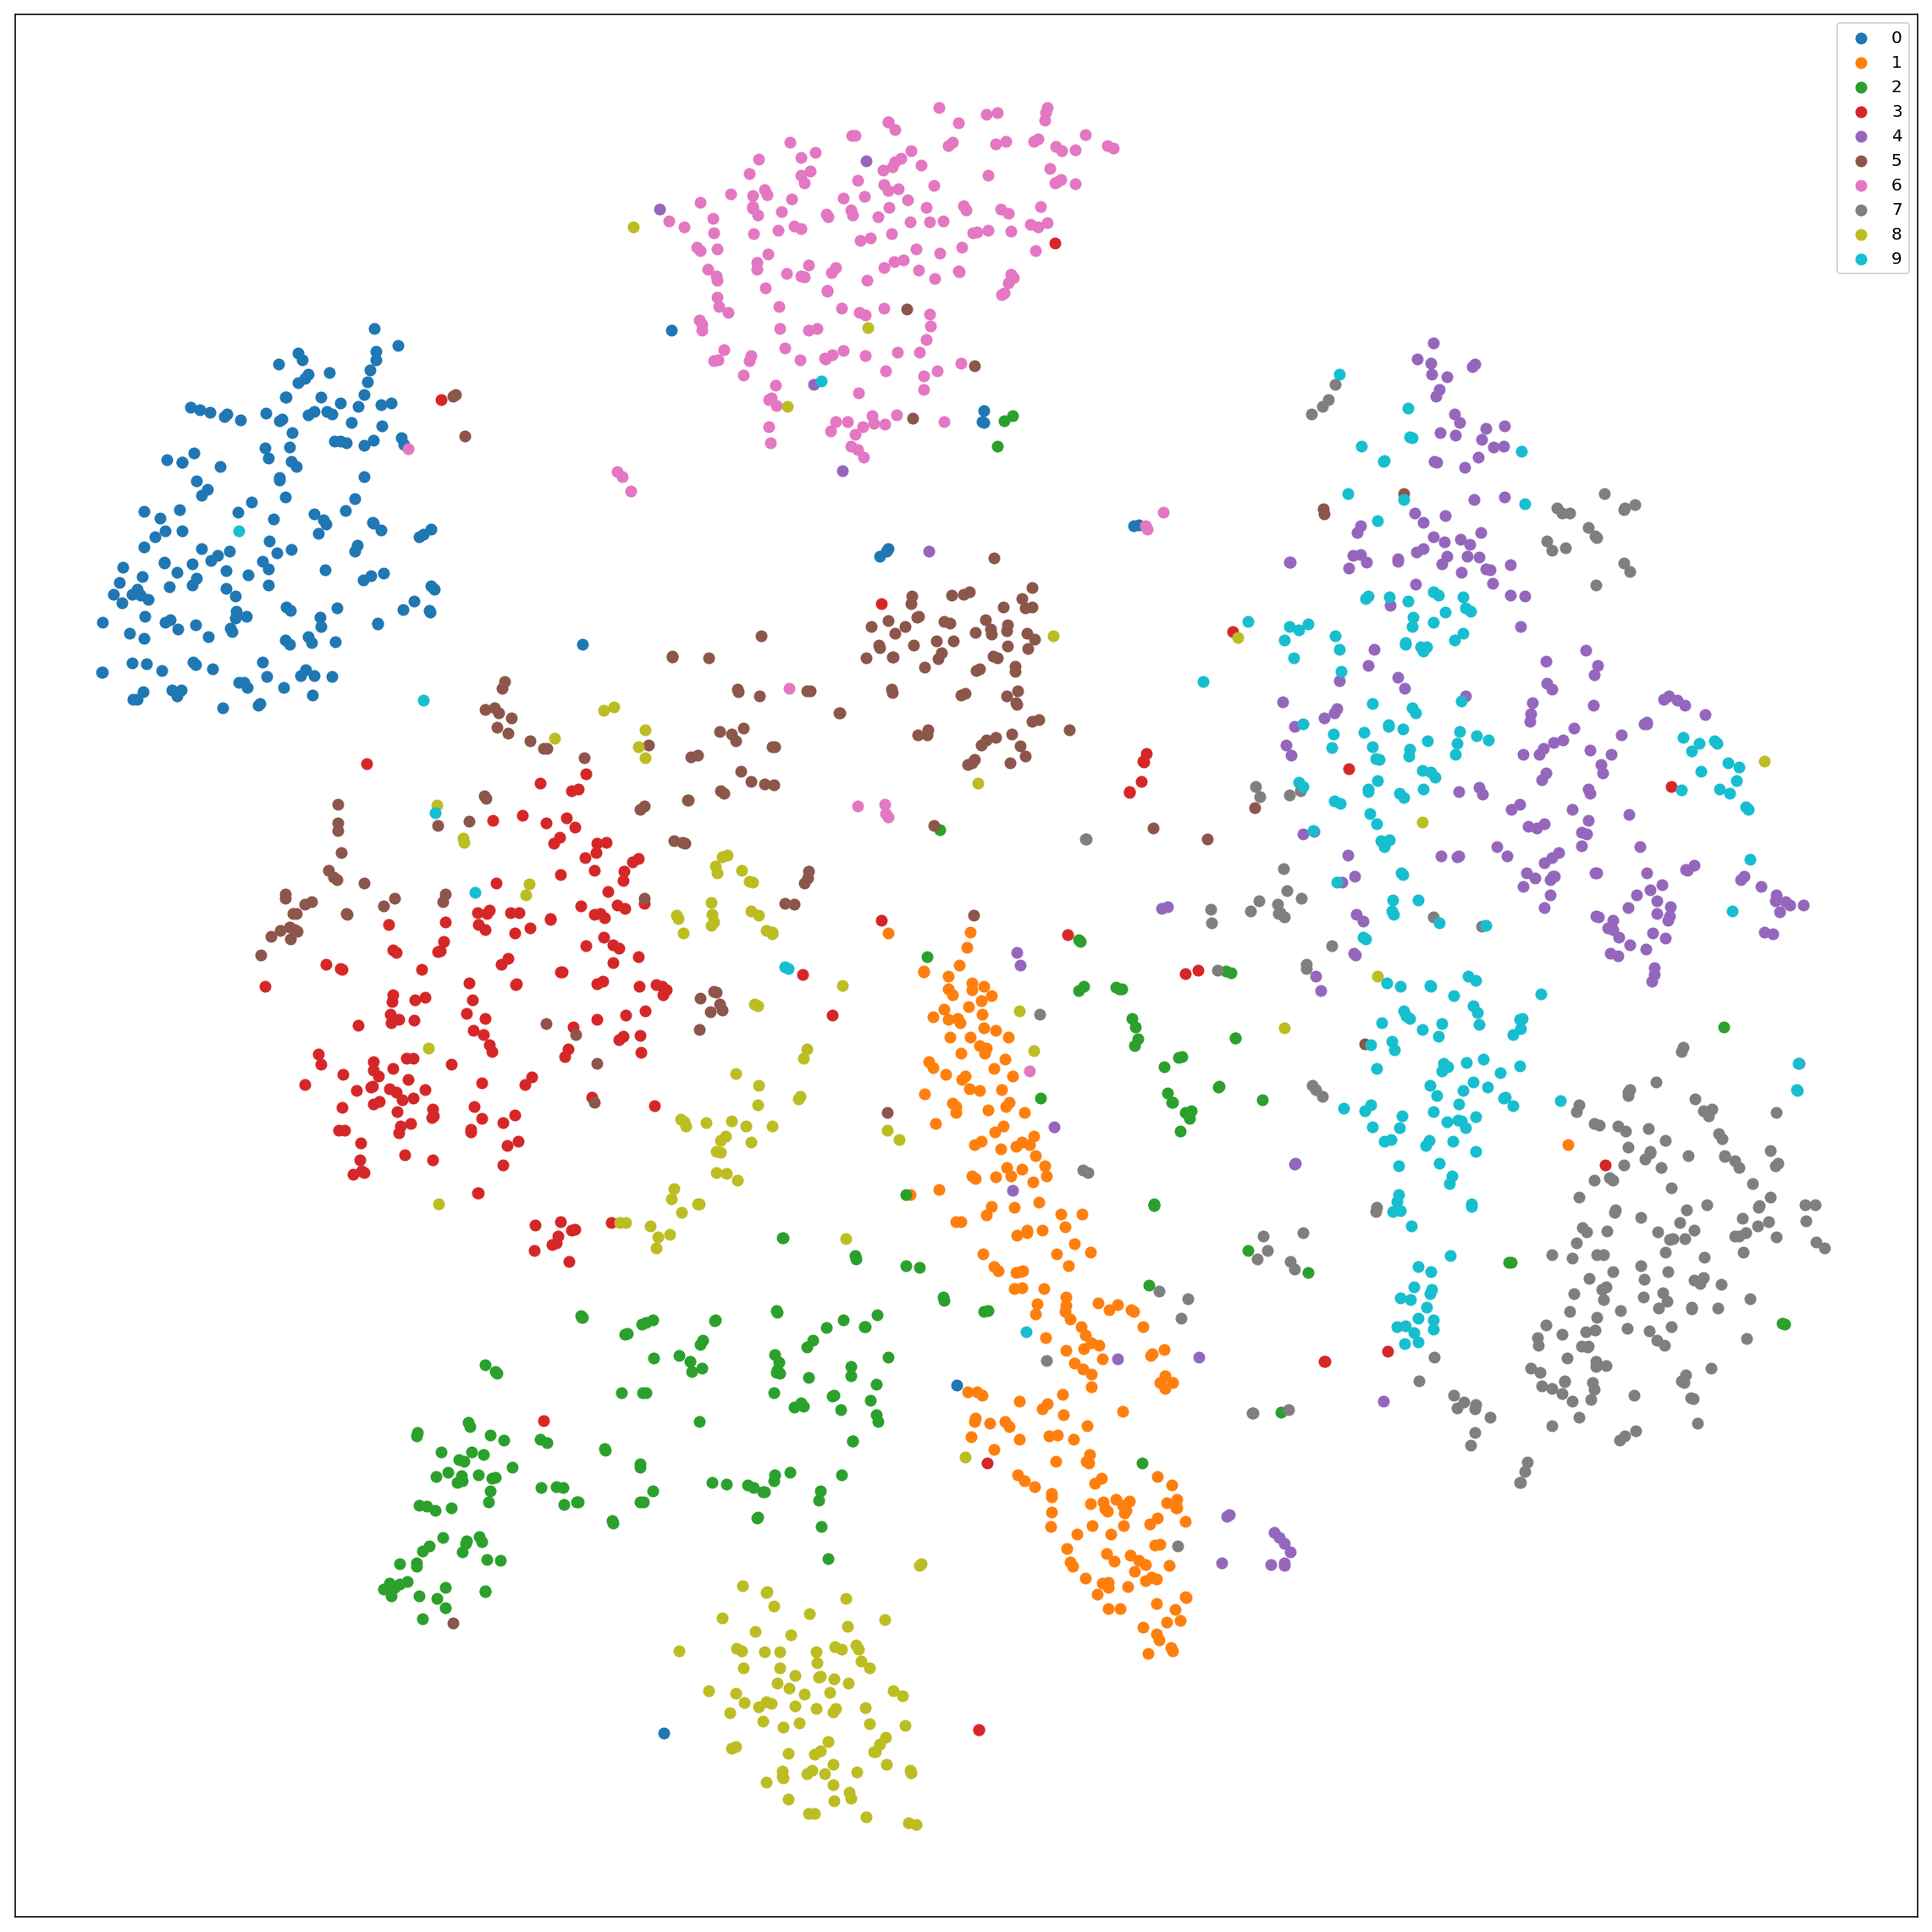

In [19]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

Jeśli mamy zainstalowane plotly, spróbujmy z interaktywnym wykresem w 3 wymiarach.

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1)))
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

In [21]:
# TODO: Use t-SNE from sklearn package to embed `X_small` in three dimensions. Store the result in `X_tsne_3d_embedded`.

# tsne_3d = ??? 
# X_tsne_3d_embedded = ???

In [22]:
# DONE!
# TODO: Use t-SNE form sklearn package to embed `X_small` in three dimensions. Store the result in `X_tsne_3d_embedded`.

tsne_3d = TSNE(n_components=3, n_iter=500, verbose=2)
X_tsne_3d_embedded = tsne_3d.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.062s...
[t-SNE] Computed neighbors for 2000 samples in 3.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 83.0926895, gradient norm = 0.3358249 (50 iterations in 5.699s)
[t-SNE] Iteration 100: error = 85.6357651, gradient norm = 0.3090159 (50 iterations in 5.143s)
[t-SNE] Iteration 150: error = 89.0685196, gradient norm = 0.2920977 (50 iterations in 5.178s)
[t-SNE] Iteration 200: error = 90.8758621, gradient norm = 0.2890670 (50 iterations in 4.525s)
[t-SNE] Iteration 250: error = 93.4770203, gradient norm = 0.2655020 (50 iterations in 4.666s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.477020
[t-SNE] Iteration 300: error = 2.2586195, gradient norm = 0.0011582 (50 iterations in 4.013s)

In [23]:
X_tsne_3d_embedded.shape

(2000, 3)

In [24]:
plot_3d_mnist_plotly_scatter(X_tsne_3d_embedded, y_small)

# Spróbujmy sklasyfikować obserwacje ze zbioru MNIST

Jak widać, zaawansowane techniki redukcji wymiarowości pozwalają na wyseparowanie wyraźnych klastrów naszych obserwacji z 784 wymiarowej przestrzeni. Skoro tak, nie powinniśmy mieć większego problemu z wytrenowaniem klasyfikatora, który poradzi sobie z zadaniem rozpoznawiania cyferek na obrazkach. 

Do tego celu skorzystamy z klasyfikatora opartego o **Support Vector Machines (SVM)**, który choć jest modelem liniowym, potrafi sobie poradzić ze znalezieniem złożonego manifoldu na którym leżą obserwacje przez tzw. **kernel trick** - czyli transformacje przestrzeni w taki sposób, aby obserwacje były separowalne liniowo. My skorzystamy z tak zwanego **Gaussian Kernel'a**, znanego inaczej **Radial Basis Function**.

In [25]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [26]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       207
          1       0.90      0.97      0.93       232
          2       0.91      0.87      0.89       186
          3       0.91      0.86      0.88       208
          4       0.89      0.95      0.91       187
          5       0.86      0.90      0.88       173
          6       0.93      0.96      0.94       216
          7       0.91      0.94      0.92       192
          8       0.93      0.84      0.88       192
          9       0.94      0.88      0.91       207

avg / total       0.91      0.91      0.91      2000




W macierzy pomyłek możemy zauważyć które klasy są mylone z którymi. Widzimy, że niektóre klasy mylą się z innymi znacznie częściej od pozostałych. Czy jest w tym jakaś zależność? Czy stoi za tym jakaś reguła? Jak to się ma do naszych rzutów w przestrzeń niskowymiarową za pomocą t-SNE?

Zobaczmy! 

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[201   0   1   1   2   0   2   0   0   0]
 [  0 224   2   1   0   3   0   0   1   1]
 [  0   8 161   2   5   0   2   4   4   0]
 [  0   6   3 179   0  10   1   3   3   3]
 [  0   1   2   0 177   0   3   1   0   3]
 [  1   1   1   6   2 155   4   0   3   0]
 [  1   3   0   0   4   1 207   0   0   0]
 [  0   3   0   0   4   0   0 181   0   4]
 [  1   1   5   5   1  12   3   2 161   1]
 [  2   2   2   3   5   0   1   9   1 182]]


# A może jakieś proste podejście z sieciami konwolucyjnymi?

Nasze podejście gubi dość istotną informację o modalności na której pracujemy! Obraz ma dość specyficzną strukturę - piksele obok siebie są skorelowane i podobne wzorce występują w różnych fragmentach obrazu. Możemy skorzystać z tej wiedzy - jeżeli zbudujemy model tak, aby uwzględniał to co wiem *a-priori* o naszych danych, powinien sobie poradzić lepiej w zadaniu klasyfikacji. 

Dokładnie to robią **sieci konwolucyjne**, znane też jako **CNN's (convolutional neural nets)**!

In [29]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.InteractiveSession()

In [30]:
x_placeholder = tf.placeholder(tf.float32, shape=[None, 784])
y_placeholder = tf.placeholder(tf.int32, shape=[None])
y_onehot = tf.one_hot(y_placeholder, 10, 1.0, 0.0)

x_image = tf.reshape(x_placeholder, [-1,28,28,1])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# first layer convolutional filters will have 5x5x1 dimensions, and theres 32 of them
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# first convnet layer (takes [?, 28, 28, 1] tensor as input, output [?, 14, 14, 32] due to 2x2 pooling)
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [31]:
# TODO: define parameter variables so that we have a correct filter tensor

# second layer convolutional filters will have 5x5x32 dimensions (notice depth increase!) - there should be 64 filters
# W_conv2 = weight_variable([5, 5, 32, 64])
# b_conv2 = bias_variable([64])

# second convnet layer (takes [?, 28, 28, 1] tensor as input, output [?, 14, 14, 32] due to 2x2 pooling)
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [32]:
# DONE!
# TODO: define parameter variables so that we have a correct filter tensor

# second layer convolutional filters will have 5x5x32 dimensions (notice depth increase!) - there should be 64 filters
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# second convnet layer (takes [?, 28, 28, 1] tensor as input, output [?, 14, 14, 32] due to 2x2 pooling)
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [33]:
# then we apply first fully connected layer at the output
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# then some dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# and finally layer that computes logits for softmax layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

correct = tf.equal(tf.argmax(logits, 1), tf.argmax(y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_onehot, logits=logits))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_loss)

init = tf.global_variables_initializer()

In [34]:
sess.run(init)

In [35]:
from itertools import cycle

def chunks(seq, size):
    return [seq[pos:pos + size] for pos in range(0, len(seq), size)]

def cycle_chunks(seq, size):
    return cycle(chunks(seq, size))

In [36]:
BATCH_SIZE = 128
BATCHES_COUNT = 500
for i, (batch, labels) in zip(range(BATCHES_COUNT), 
                              zip(cycle_chunks(X_train, BATCH_SIZE), 
                                  cycle_chunks(y_train, BATCH_SIZE))):
    if i % 10 == 0:
        train_accuracy = accuracy.eval(feed_dict={x_placeholder:batch, y_placeholder: labels, keep_prob: 1.0})
        print("Step {0}, training accuracy {1:>2.2f}".format(i, 100 * train_accuracy))
    train_step.run(feed_dict={x_placeholder: batch, y_placeholder: labels, keep_prob: 0.5})

print("Test accuracy {0:>2.2f}".format(
    100 * accuracy.eval(feed_dict={x_placeholder: X_test, y_placeholder: y_test, keep_prob: 1.0})))

Step 0, training accuracy 5.47
Step 10, training accuracy 25.00
Step 20, training accuracy 41.41
Step 30, training accuracy 65.62
Step 40, training accuracy 73.44
Step 50, training accuracy 88.28
Step 60, training accuracy 78.91
Step 70, training accuracy 87.50
Step 80, training accuracy 85.16
Step 90, training accuracy 88.28
Step 100, training accuracy 88.28
Step 110, training accuracy 89.06
Step 120, training accuracy 88.28
Step 130, training accuracy 94.53
Step 140, training accuracy 87.50
Step 150, training accuracy 92.97
Step 160, training accuracy 88.28
Step 170, training accuracy 96.09
Step 180, training accuracy 92.19
Step 190, training accuracy 92.97
Step 200, training accuracy 93.75
Step 210, training accuracy 89.84
Step 220, training accuracy 96.88
Step 230, training accuracy 94.53
Step 240, training accuracy 93.75
Step 250, training accuracy 96.09
Step 260, training accuracy 95.31
Step 270, training accuracy 94.53
Step 280, training accuracy 92.97
Step 290, training accurac

Bazowaliśmy na części zbioru MNIST - dość łatwo możemy zwiększyć *accuracy* do poziomy około 98%. W praktyce najnowsze metody znacznie przekraczają poziom 99%. Najważnieszy wniosek jest taki, że dość łatwo udało nam się wykorzystać informację, którą znaliśmy *a-priori*, o strukturze danych do sformułowania rozwiązania dającego lepsze rezultaty. No cóż, pewnie dlatego w uczeniu maszynowym mamy tak wiele różnych modeli - po prostu każda modalność rządzi się swoimi prawami.

## Dzięki za udział w workshopie, do zobaczenia na hackatonie!